In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import torch
import torch.nn as nn
import cv2

# Create kernel

In [2]:
window = np.zeros((5,5)) # initialize window

cr = 2
cc = 2
for i,j in product(range(5),range(5)):
    d = abs(cr-i) + abs(cc-j) # Manhattan distance
    window[i,j] = -0.375 * d + 1

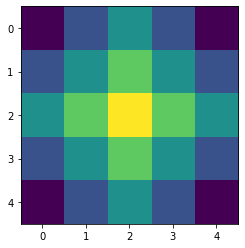

In [3]:
plt.imshow(window)
plt.show()

# Load Image

In [4]:
image = cv2.imread('0.png',0)

# Convolution

In [5]:
with torch.no_grad():
    conv = nn.Conv2d(1,1,(5,5),padding=2,bias=False,padding_mode='zeros')
    conv.weight = nn.Parameter(torch.tensor(window.reshape(1,1,*window.shape),dtype=torch.float32))
    input_tensor = torch.tensor(image.reshape(1,1,*image.shape),dtype=torch.float32)
    P = conv(input_tensor).numpy().reshape(*image.shape)

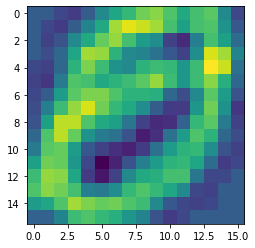

In [6]:
plt.imshow(P)
plt.show()

# Generate Spike

In [7]:
T = 1 #duration
dt = 0.005
time = np.arange(0,T+dt,dt)

In [8]:
freqs = np.ceil(0.102*P.reshape(-1) + 52.02) # High depolarization = High freq
periods = np.ceil(200/freqs) # High depol = Slow Period

spiketrain = np.zeros((time.shape[0],*freqs.shape))
for i,t in enumerate(time):
    spiketrain[i] = (i%periods == 0)*1.
    #breakpoint()
spiketrain = [spiketrain[:,i] for i in range(spiketrain.shape[1])]

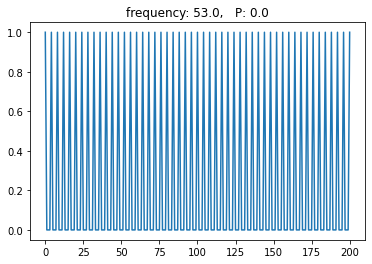

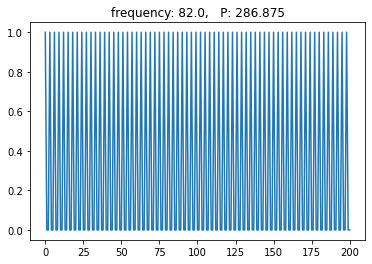

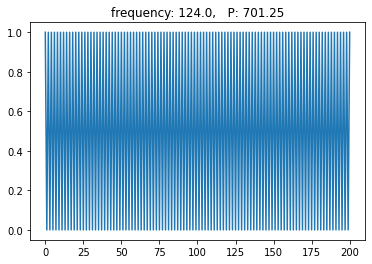

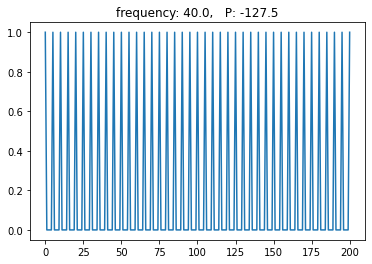

In [9]:
for i in [0,5,10,15]:
    idx = i
    plt.plot(spiketrain[idx])
    plt.title(f"frequency: {freqs[idx]},   P: {P[idx//16,idx%16]}")
    plt.show()